In [66]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from statistics import mean

In [68]:
photons = 10000
steps = 1000

random.seed(0)

# Random Walk in 1D

In [69]:
def Random_walk_1D(Photons, Steps, l_mean=1):
    CompTime = []
    x_point = []
    for i in range(Photons):
        x = 0
        y = 0
        start = time.time()
        for i in range(Steps):
            if random.random() < 0.5:
                x = x+l_mean
            else:
                x = x-l_mean
        end = time.time()
        CompTime.append(end-start)
        x_point.append(x)
    return np.array(x_point), mean(CompTime)

In [70]:
def Present_1D_Results(distance_1D, time_1D):
    print(f"The mean computational time is {time_1D} seconds\n")

    print(
        f"The Mean number of steps to escape the system for 10 photons is: {escape_1D} steps \n\n")

    r = np.linspace(-100, 100, 200)
    N = steps
    Gaussian = (2*N*np.pi)**(-1/2)*np.exp(-r**2/(2*N))

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.hist(distance_1D, bins=120, density=True)
    ax.plot(r, Gaussian, label="Gaussian Distribution")
    ax.set_xlabel("Distance from origin")
    ax.set_ylabel("Frequency density")
    ax.set_title(f"Histogram of {photons} photons doing {steps} steps")
    ax.legend()
    plt.show()
    return

In [71]:
def Mean_number_of_Steps_1D(Photons, R=1000, l_mean=1):
    N = []
    for i in range(Photons):
        n = 1
        Inside_system = True
        x = 0
        y = 0
        while Inside_system:
            P = random.random()
            if random.random() < 0.5:
                x = x+l_mean
            else:
                x = x-l_mean
            if x > R:
                N.append(n)
                Inside_system = False
            n = n+1
    return mean(N)

In [72]:
distance_1D, time_1D = Random_walk_1D(photons, steps, l_mean=1)

In [73]:
escape_1D = Mean_number_of_Steps_1D(10)

The mean computational time is 0.00016336348056793213 seconds

The Mean number of steps to escape the system for 10 photons is: 135766498.2 steps 




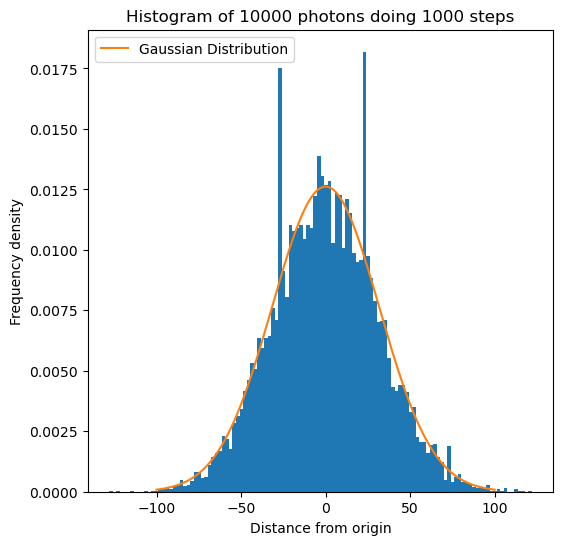

In [74]:
Present_1D_Results(distance_1D, time_1D)

# Random Walk in 2D

A random walk in 2 dimensions with step length of $α$ follows a Rayleigh distribution for a sufficiently large step number N :
$$P = \frac{2R}{α^2 N}e^{-R^2/{α^2N}}, R_{mean}=\sqrt{\frac{\pi N}{4}},$$
with R representing the distance from the origin.

A detailed discussion can be found here: https://ocw.mit.edu/courses/18-366-random-walks-and-diffusion-fall-2006/aef0a2690183294e59ea8cb29f8dd448_lec01.pdf

Taking into consideration that the differential solid angle in 2d can be written as $d\Omega=d\theta$ we can draw samples for theta in an uniform distribution from $\theta \in [0,2\pi)$ for our Monte Carlo simulation.

In [75]:
def Random_walk_2D(Photons, Steps, l_mean=1):
    CompTime = []
    x_point = []
    y_point = []
    x_vec = [0]
    y_vec = [0]
    for i in range(Photons):
        x = 0
        y = 0
        start = time.time()
        for i in range(Steps):
            theta = 2*np.pi*random.random()
            x = x+l_mean*np.cos(theta)
            y = y+l_mean*np.sin(theta)
            if len(x_point) == 0:
                x_vec.append(x)
                y_vec.append(y)
        end = time.time()
        CompTime.append(end-start)
        x_point.append(x)
        y_point.append(y)
    return np.array(x_point), np.array(y_point), np.array(x_vec), np.array(y_vec), mean(CompTime)

In [76]:
def Mean_number_of_Steps_2D(Photons, R=1000, l_mean=1):
    N = []
    for i in range(Photons):
        n = 1
        Inside_system = True
        x = 0
        y = 0
        while Inside_system:
            theta = 2*np.pi*random.random()
            x = x+l_mean*np.cos(theta)
            y = y+l_mean*np.sin(theta)
            if x**2+y**2 > R**2:
                N.append(n)
                Inside_system = False
            n = n+1
    return mean(N)

In [77]:
def Present_2D_Results(x_point, y_point, x_vec, y_vec, mean_time):
    print(f"The mean computational time is {mean_time} seconds\n")

    print(
        f"The Mean number of steps to escape the system for 10 photons is: {escape_2D} steps \n\n")

    N = steps

    # Distribution
    R = (x_point**2+y_point**2)**(1/2)
    r = np.linspace(0, 90)
    P = (2*r/N)*np.exp(-(r**2)/N)
    R_mean_th = (np.pi*N/4)**(1/2)

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].hist(R, bins=100, density=True)
    ax[0].plot(r, P, label="Rayleigh Distribution")
    ax[0].axvline(R_mean_th, color='r', linestyle="--",
                  label='Theoretical $R_{mean}$')
    ax[0].axvline(mean(R), color='k', linestyle="--",
                  label='Calculated $R_{mean}$')
    ax[0].set_xlabel("Distance from origin")
    ax[0].set_ylabel("Frequency density")
    ax[0].legend()
    ax[0].set_title(f"Histogram of {photons} photons doing {steps} steps")

    # Scattered positions

    ax[1].scatter(x_point, y_point, marker="x", linewidths=0.35)
    ax[1].set_xlabel("$x$")
    ax[1].set_ylabel("$y$")
    ax[1].set_title(
        f'Final positions of {photons} photons after {steps} steps ')

    # Walk
    ax[2].plot(x_vec, y_vec)
    ax[2].set_xlabel("$x$")
    ax[2].set_ylabel("$y$")
    ax[2].set_title('Path travelled by the first photon')

    plt.show()
    return

In [78]:
x_point2D, y_point2D, x_vec2D, y_vec2D, mean_time2D = Random_walk_2D(
    photons, steps)

In [79]:
escape_2D = Mean_number_of_Steps_2D(10)

The mean computational time is 0.0027119714736938477 seconds

The Mean number of steps to escape the system for 10 photons is: 788621.4 steps 




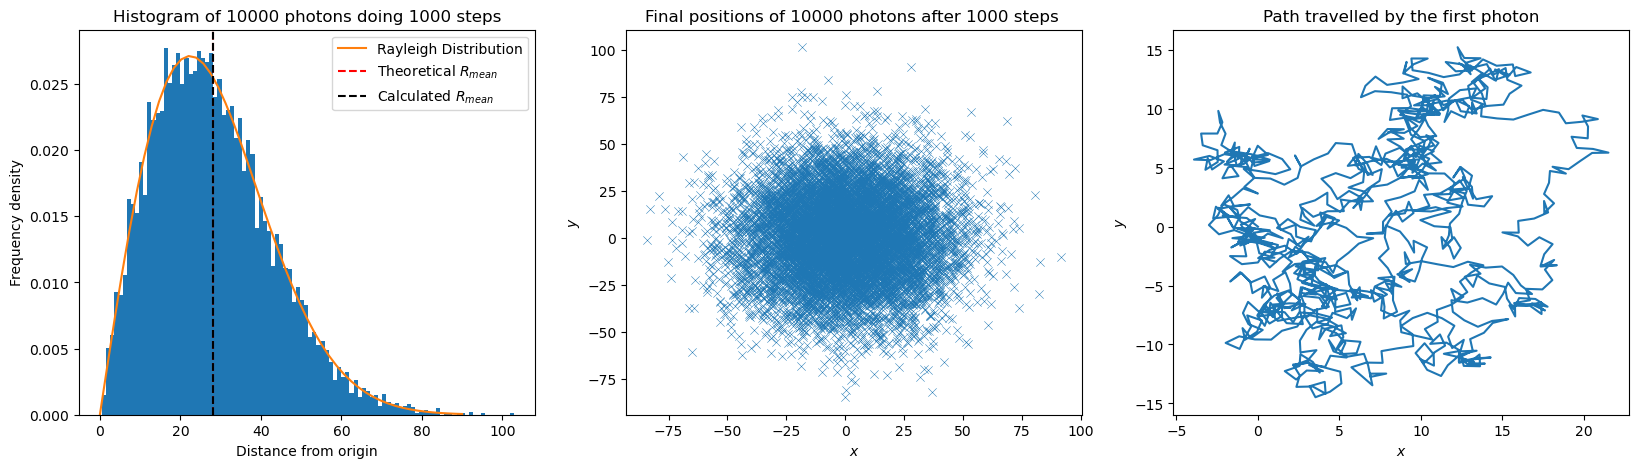

In [80]:
Present_2D_Results(x_point2D, y_point2D, x_vec2D, y_vec2D, mean_time2D)

# Random Walk in 3D

Taking into consideration that the differential solid angle in 3D can be written as $d\Omega=\sin\theta d\theta d\phi = -d\cos\theta d\phi=d\mu d\phi$ we can draw samples for $\phi$ in an uniform distribution from $\phi \in [0,2\pi)$, and for $\mu$ from $\mu \in [-1,1)$ for our Monte Carlo simulation.

In [81]:
def Random_walk_3D(Photons, Steps, l_mean=1):
    CompTime = []
    x_point = []
    y_point = []
    z_point = []
    x_vec = [0]
    y_vec = [0]
    z_vec = [0]
    for i in range(Photons):
        x = 0
        y = 0
        z = 0
        start = time.time()
        for i in range(Steps):
            phi = 2*np.pi*random.random()
            mi = random.uniform(-1, 1)
            x = x+l_mean*np.sin(phi)*mi
            y = y+l_mean*np.cos(phi)*(1-mi**2)**(1/2)
            z = z+l_mean*mi
            if len(x_point) == 0:
                x_vec.append(x)
                y_vec.append(y)
                z_vec.append(z)
        end = time.time()
        CompTime.append(end-start)
        x_point.append(x)
        y_point.append(y)
        z_point.append(z)
    return np.array(x_point), np.array(y_point), np.array(z_point), np.array(x_vec), np.array(y_vec), np.array(z_vec), mean(CompTime)

In [82]:
def Mean_number_of_Steps_3D(Photons, R=1000, l_mean=1):
    N = []
    for i in range(Photons):
        n = 1
        Inside_system = True
        x = 0
        y = 0
        z = 0
        while Inside_system:
            phi = 2*np.pi*random.random()
            mi = random.uniform(-1, 1)
            x = x+l_mean*np.sin(phi)*mi
            y = y+l_mean*np.cos(phi)*(1-mi**2)**(1/2)
            z = z+l_mean*mi
            if x**2+y**2+z**2 > R**2:
                N.append(n)
                Inside_system = False
            n = n+1
    return mean(N)

In [83]:
def Present_3D_Results(x_point, y_point, z_point, x_vec, y_vec, z_vec, mean_time):
    print(f"The mean computational time is {mean_time} seconds\n")

    print(
        f"The Mean number of steps to escape the system for 10 photons is: {escape_3D} steps \n\n")

    fig = plt.figure(figsize=(20, 5))

    ax = fig.add_subplot(1, 3, 1)
    R = (x_point**2+y_point**2+z_point**2)**(1/2)
    ax.hist(R, bins=100, density=True)
    ax.axvline(mean(R), label='$R_{mean}$', color='r')
    ax.set_xlabel("Distance from origin")
    ax.set_ylabel("Frequency density")
    ax.set_title(f"Histogram of {photons} photons doing {steps} steps")
    ax.legend()

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.scatter(x_point, y_point, z_point, marker="x", linewidths=0.35)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    ax.set_title(
        f'Final positions of {photons} photons after {steps} steps ')

    # Path walked
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot(x_vec, y_vec, z_vec)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    ax.set_title('Path travelled by the first photon')

    plt.show()
    return

In [84]:
x_point3D, y_point3D, z_point3D, x_vec3D, y_vec3D, z_vec3D, mean_time3D = Random_walk_3D(
    photons, steps)

In [85]:
escape_3D = Mean_number_of_Steps_3D(10)

The mean computational time is 0.003771105217933655 seconds

The Mean number of steps to escape the system for 10 photons is: 1109776.1 steps 




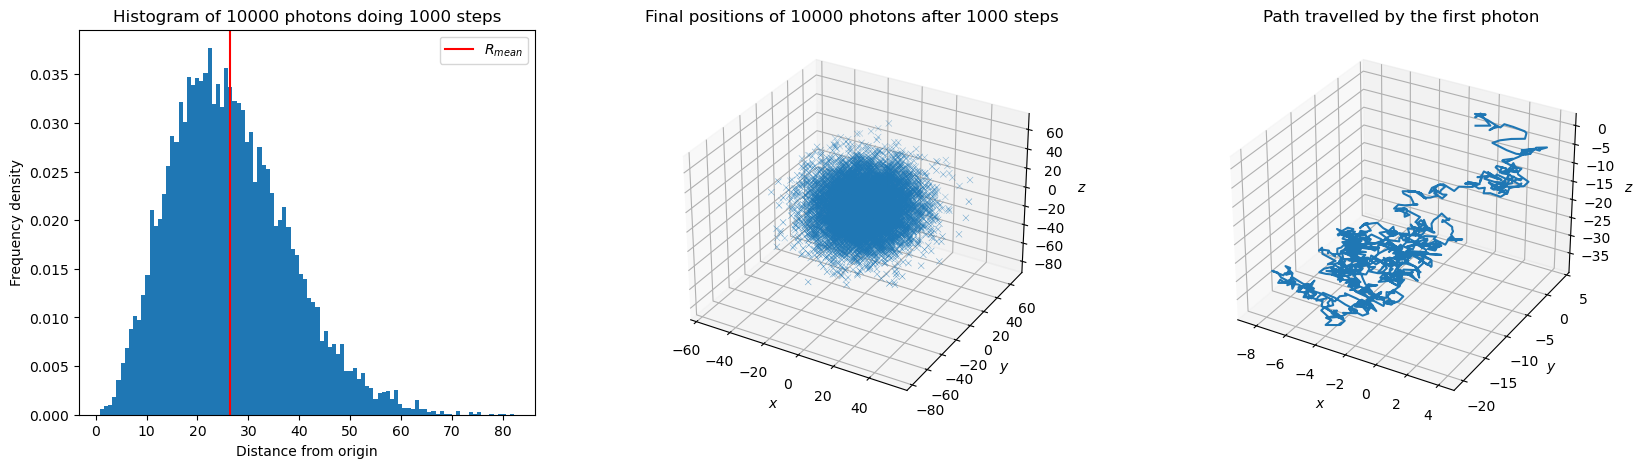

In [86]:
Present_3D_Results(x_point3D, y_point3D, z_point3D,
                   x_vec3D, y_vec3D, z_vec3D, mean_time3D)

# Mean Steps to escape the system

Using $\bar l=1$ and $R=100$ we can find the mean number of steps to escape each system. We are using a sample size of 10 photons to keep the computational cost low.

In [87]:
print(
    f"The Mean number of steps to escape the 1D system for 10 photons is: {escape_1D} steps \n")
print(
    f"The Mean number of steps to escape the 2D system for 10 photons is: {escape_2D} steps \n")
print(
    f"The Mean number of steps to escape the 3D system for 10 photons is: {escape_3D} steps \n")

The Mean number of steps to escape the 1D system for 10 photons is: 135766498.2 steps 

The Mean number of steps to escape the 2D system for 10 photons is: 788621.4 steps 

The Mean number of steps to escape the 3D system for 10 photons is: 1109776.1 steps 

